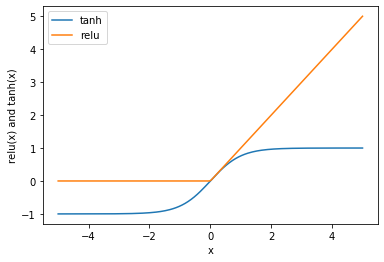

In [135]:
# 多层神经网络又称深度学习，神经网络中使用的是多层感知器(Multilayer Perceptron，MLP)，MLP也被称为前馈神经网络
# 神经网络的原理和前面说的线性模型很像，线性模型一般公式 y-hat = w[0]·x[0]+w[1]·x[1]+...+w[p]·x[p]+b
# 但是有区别，其中最大的地方就是在MLP模型中，算法在过程里面添加了隐藏层(Hidden Layers)，然后在隐藏层重复进行加权求和计算，最终把隐藏层算出的结果用于生成最终结果。
# 这样的话，模型要学习的特征系数（权重）就会多很多，因为每一条路径都有一个系数。

# 从数学的角度看，他跟线性模型没什么两样，但为了能更突出神经网络的强大，需要对其进行一些处理。
# 这处理便是在生成隐藏层之后，对结果进行非线性矫正(rectifying nonlinearity)，简称为relu(rectified linear unit)
# 或者进行双曲正切处理(tangens hyperbolicus)，简称为tanh。通过这两种方式处理后的结果来计算最终结果y。

# 导入基础科学库
import numpy as np
# 导入画图工具
import matplotlib.pyplot as plt

# 创建一个200个元素的等差数列[-5,5]
line = np.linspace(-5, 5, 200)

# 画出非线性矫正的图形表示
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x) and tanh(x)')
plt.show()

# 可以看到tanh把特征的数值压缩到-1~1的区间，-1表示较小的值，1代表较大的值。
# 而relu把小于0的值都设为0。这两种方法都是将样本特征进行简化，从而便于神经网络对复杂的非线性数据集进行学习。
# w和v都是通过对数据的学习得出的

# 在小规模数据集中，节点数量设置为10就足够了，而对于大规模数据集，可通过配置隐藏层中的节点数量和隐藏层的层数来满足需要。

In [136]:
# 下面使用MLP算法中的MLP分类器对酒的数据集进行分类
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data[:,:2] # 取钱两个特征
y = wine.target
# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
mlp = MLPClassifier(solver='lbfgs', max_iter=1000, hidden_layer_sizes=[10,10]) # 使用权重优化模式（Weight Optimization Method）为拟牛顿法（Quasi-Newton Method）的解算器
mlp.fit(X_train, y_train)

# activation指定的是将隐藏单元进行非线性化的方法，一共有四种："identity"、"logistic"、"rulu"以及"tanh"。identity就是不对样本特征进行处理f(x)=x，而logistic方法的返回值是f(x) = 1 / (1 + exp(-x))，和tanh很像，但它的取值为0~1,。最后两种方法在前面已经说过就不累述了。
# alpha值就是L2惩罚项，他用于控制正则化的程度，默认值是0.0001。
# hidden_layer_sizes指的就是隐藏层的数量以及节点数，如这里的[100,]指的就是有一个隐藏层，这个隐藏层有100个节点。而如果是[20,20,]表示的是有两个节点数都为20的隐藏层。

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[10, 10], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

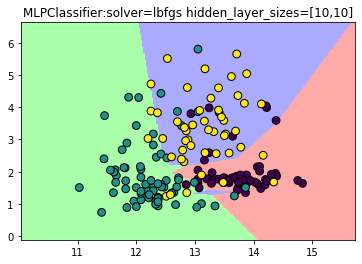

In [137]:
# 导入画图工具和颜色工具
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 使用不同色块进行画图
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 将数据用散点图表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 设置图片题目
plt.title('MLPClassifier:solver=lbfgs hidden_layer_sizes=[10,10]')

plt.show()

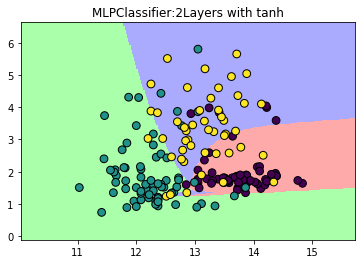

In [138]:
# 设置激活函数为tanh
mlp_tanh = MLPClassifier(solver='lbfgs', max_iter=10000, hidden_layer_sizes=[10, 10], activation='tanh')
mlp_tanh.fit(X_train, y_train)

# 重新画图
Z2 = mlp_tanh.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z2, cmap=cmap_light)

# 用散点图画X
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:2Layers with tanh")

plt.show()

# 可以看到激活函数改成tanh后分类器的决定边界完全变成平滑的曲线，这就是对样本特征进行双曲线正切后的结果。

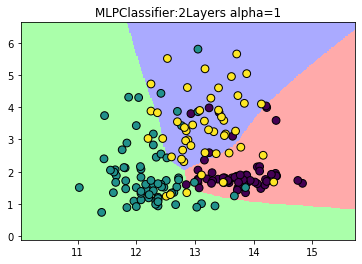

In [139]:
# 修改模型的alpha值（L2正则化程度）
# 设置激活函数为tanh
mlp_tanh = MLPClassifier(solver='lbfgs', alpha=1, max_iter=10000, hidden_layer_sizes=[10, 10], activation='tanh')
mlp_tanh.fit(X_train, y_train)

# 重新画图
Z2 = mlp_tanh.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z2, cmap=cmap_light)

# 用散点图画X
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:2Layers alpha=1")

plt.show()

# 通过增加alpha值，加大模型正则化程度，让模型更加简单，决定边界就没上面那样细腻了。

In [140]:
# 神经网络实例————手写识别
# MNIST数据集是一个专门用于训练各种图像处理系统的数据集，它包含7万个手写数字图像，其中6万个是训练数据，1万个是测试数据。
# 使用fetch_dldata获取MNIST数据集

# 导入数据集获取工具
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
print('mnist keys:', mnist.keys(), '\n')
print('mnist data:', mnist['data'],'\n')
print('mnist description:', mnist['DESCR'],'\n')

mnist keys: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url']) 

mnist data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

mnist description: **Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and fo

In [141]:
# 打印样本和特征数量
print("amount of samples:{}, amount of features:{}".format(mnist.data.shape[0], mnist.data.shape[1]))

amount of samples:70000, amount of features:784


In [142]:
# 建立训练数据集和测试数据集
X = mnist.data/255.
y = mnist.target
# 选取5000个样本作为训练集，1000个样本作为测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=5000, test_size=1000, random_state=62)
# 训练MLP神经网络
mlp_hw = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100, 100], 
                    activation='relu', alpha=1e-5, random_state=62)
mlp_hw.fit(X_train, y_train)
print('test set score:{:.2f}%'.format(mlp_hw.score(X_test, y_test)*100))

test set score:92.70%


In [1]:
# 导入图像处理工具，将图片转换成灰度图和28*28的尺寸
from PIL import Image
# 打开图像
image = Image.open('3.png').convert('F')
# 调整图像大小
image = image.resize((28, 28))
arr=[]
# 将图像中的像素作为预测数据点的特征值
for i in range(28):
    for j in range(28):
        pixel = 1.0 - float(image.getpixel((j, i)))/255.
        arr.append(pixel)
# 由于只有一个样本，需要进行reshape操作
arr1 = np.array(arr).reshape(1, -1)
print('recognized result:{}'.format(mlp_hw.predict(arr1)[0]))

# sklearn中的MLP分类和回归在易用性方面表现不错，但仅限于处理小数据集。
# 当下比较热门的深度学习框架主要由Keras、Theano和TensorFlow，其中Keras可以使用后两者作为后端（backend）。
# 他们都可以使用GPU加速，但sklearn不支持，所以这几种框架的效率会更高。
# 虽然说神经网络在算力强的时候会比其他模型表现更优异，但它也存在问题，如模型训练的时间长、对数据的预处理要求高等等。
# 它适合处理特征类型比较少的数据集，但对于特征类型差异比较大的数据集，随机森林或者是梯度上升决策树等基于决策树的算法会表现得更好。

NameError: name 'np' is not defined